Name: Sahaj Shrestha  
Course: MSCS-634 Advanced Big Data and Data Mining
Date: 2025-06-01  

In [51]:
import pandas as pd

df = pd.read_csv('Walmart_Sales.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


- **Scatter Plot Insight:** The weekly sales is defnitely higher when the unemployment number is low ( since there are more scattered points on the left), but sales are maximum when umemployement is in between the highest and the lowest. This leads to a theory that when unemployment is high, sales are low because people could not afford the items, and when the unemployment is low, people might be too busy to go out for shopping, but when unemployement is in between the highest and the lowest, people to go out for shopping the most. 
- **Histogram Insight:** Sales data is right-skewed with a majority of sales values concentrated on the lower end.

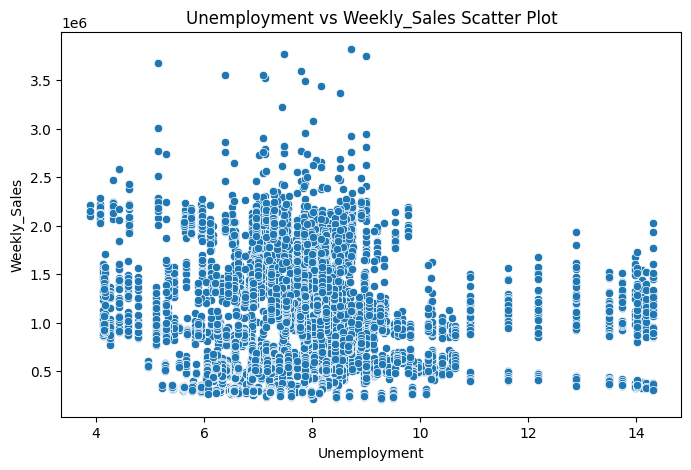

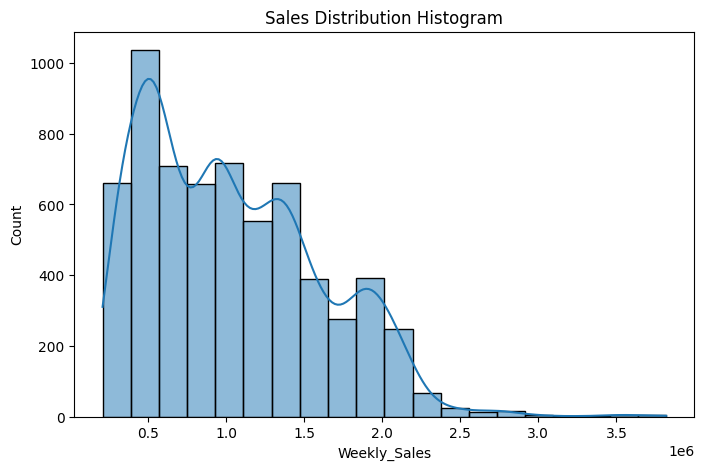

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Unemployment vs Weekly Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Unemployment vs Weekly_Sales Scatter Plot')
plt.show()

# Histogram: Distribution of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=20, kde=True)
plt.title('Sales Distribution Histogram')
plt.show()

# My dataset had no missing data at all. If there was any, I was planning to replace them with Mean value.

In [61]:
if df.isnull().values.any():
    print("Missing values found!")
    print(df.isnull().sum())
else:
    print("No missing values found.")

No missing values found.


# Here we can have the Boxplot of Weekly Sales with outliers. 

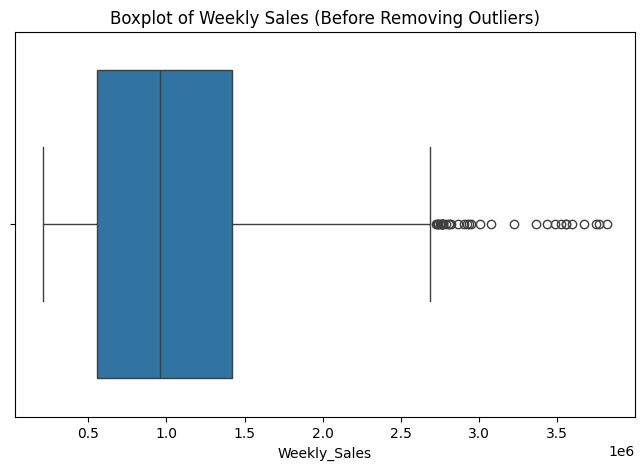

In [28]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales (Before Removing Outliers)')
plt.show()

In [29]:
# IQR method for 'Weekly_Sales'
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Weekly_Sales'] < lower) | (df['Weekly_Sales'] > upper)]
print(f"Outliers detected: {len(outliers)}")

# Remove outliers
df_no_outliers = df[(df['Weekly_Sales'] >= lower) & (df['Weekly_Sales'] <= upper)]


Outliers detected: 34


# Box Plot after we remove the outliers

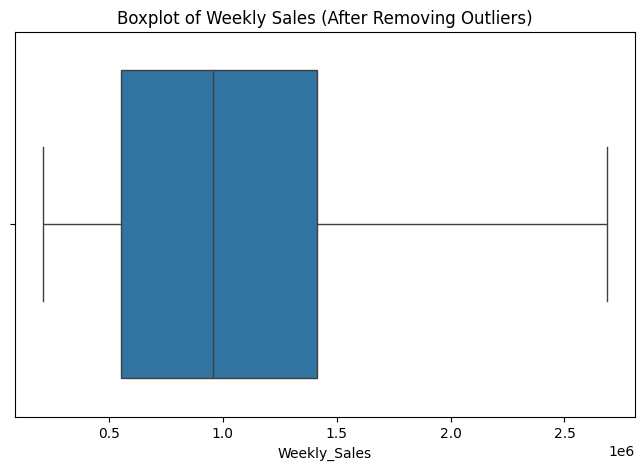

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales (After Removing Outliers)')
plt.show()

In [31]:
df.head(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
95,1,02-12-2011,1584083.95,0,48.91,3.172,218.714733,7.866
96,1,09-12-2011,1799682.38,0,43.93,3.158,218.961846,7.866
97,1,16-12-2011,1881176.67,0,51.63,3.159,219.179453,7.866
98,1,23-12-2011,2270188.99,0,47.96,3.112,219.357722,7.866


In [47]:
# Sampling 50% of the data
df_sampled = df.sample(frac=0.01, random_state=1)

# Dropping CPI and Temperature columns because we do not need them
df_reduced = df.drop(columns=['CPI', 'Temperature'])

# This can be un commented to see the sampled list
# df_sampled.head(100)
df_reduced.head(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,Unemployment
0,1,05-02-2010,1643690.90,0,2.572,8.106
1,1,12-02-2010,1641957.44,1,2.548,8.106
2,1,19-02-2010,1611968.17,0,2.514,8.106
3,1,26-02-2010,1409727.59,0,2.561,8.106
4,1,05-03-2010,1554806.68,0,2.625,8.106
...,...,...,...,...,...,...
95,1,02-12-2011,1584083.95,0,3.172,7.866
96,1,09-12-2011,1799682.38,0,3.158,7.866
97,1,16-12-2011,1881176.67,0,3.159,7.866
98,1,23-12-2011,2270188.99,0,3.112,7.866


# Before we do the scaling, we print the Temperature vs Fuel Price and note that the X vs Y units hit the max of 100F and $4.5 respectively. The units are different and the comparision is not intuitive. 

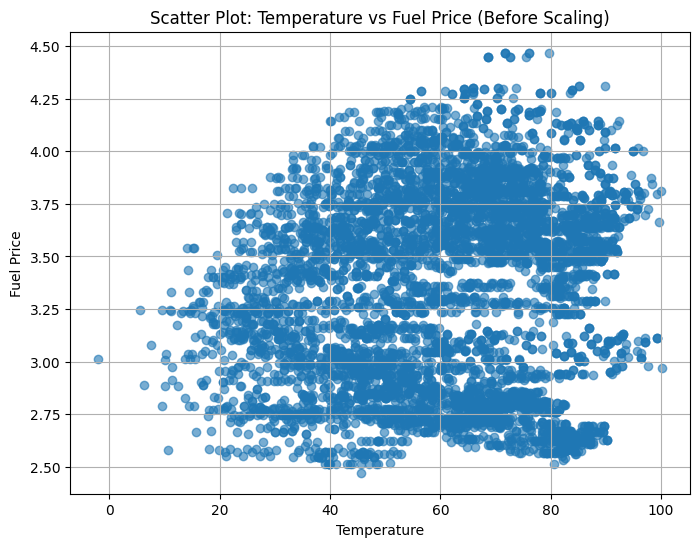

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['Fuel_Price'], alpha=0.6)
plt.title('Scatter Plot: Temperature vs Fuel Price (Before Scaling)')
plt.xlabel('Temperature')
plt.ylabel('Fuel Price')
plt.grid(True)
plt.show()


# Scaling the data and viewing the Temperature vs Fuel Scatter Plot again

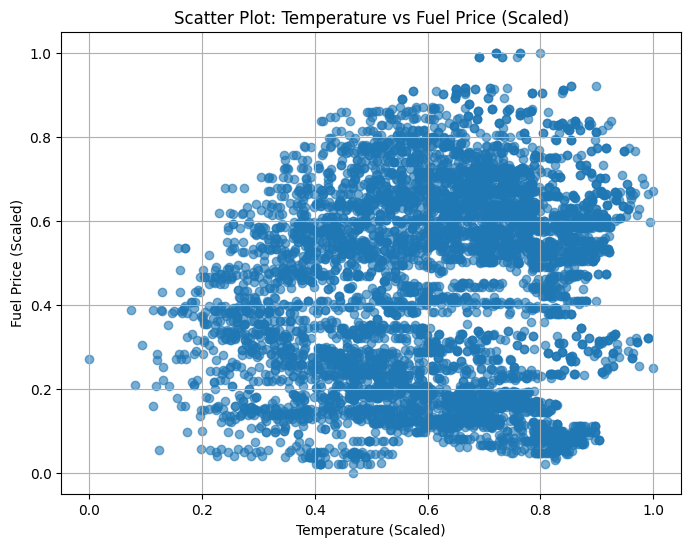

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Scaling Temperature and Fuel_Price
scaler = MinMaxScaler()
df[['Temperature', 'Fuel_Price']] = scaler.fit_transform(df[['Temperature', 'Fuel_Price']])

# Discretize Temperature into bins
df['Temp_Category'] = pd.cut(df['Temperature'], bins=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['Fuel_Price'], alpha=0.6)
plt.title('Scatter Plot: Temperature vs Fuel Price (Scaled)')
plt.xlabel('Temperature (Scaled)')
plt.ylabel('Fuel Price (Scaled)')
plt.grid(True)
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Store          6435 non-null   int64   
 1   Date           6435 non-null   object  
 2   Weekly_Sales   6435 non-null   float64 
 3   Holiday_Flag   6435 non-null   int64   
 4   Temperature    6435 non-null   float64 
 5   Fuel_Price     6435 non-null   float64 
 6   CPI            6435 non-null   float64 
 7   Unemployment   6435 non-null   float64 
 8   Temp_Category  6435 non-null   category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 408.7+ KB


In [57]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,0.613736,0.444192,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,0.180479,0.229970,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,0.000000,0.000000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,0.484540,0.230962,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,0.633366,0.487475,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,0.753425,0.632766,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,1.000000,1.000000,227.232807,14.313000


# Central Tendency Measures

In [58]:
print("Minimum:", df['Weekly_Sales'].min())
print("Maximum:", df['Weekly_Sales'].max())
print("Mean:", df['Weekly_Sales'].mean())
print("Median:", df['Weekly_Sales'].median())
print("Mode:", df['Weekly_Sales'].mode()[0])


Minimum: 209986.25
Maximum: 3818686.45
Mean: 1046964.8775617715
Median: 960746.04
Mode: 209986.25


# Dispersion Measures

In [59]:
range_sales = df['Weekly_Sales'].max() - df['Weekly_Sales'].min()
iqr = df['Weekly_Sales'].quantile(0.75) - df['Weekly_Sales'].quantile(0.25)
print("Range:", range_sales)
print("IQR:", iqr)
print("Variance:", df['Weekly_Sales'].var())
print("Standard Deviation:", df['Weekly_Sales'].std())


Range: 3608700.2
IQR: 866808.5549999999
Variance: 318509684088.30096
Standard Deviation: 564366.6220536975


# Correlation Analysis

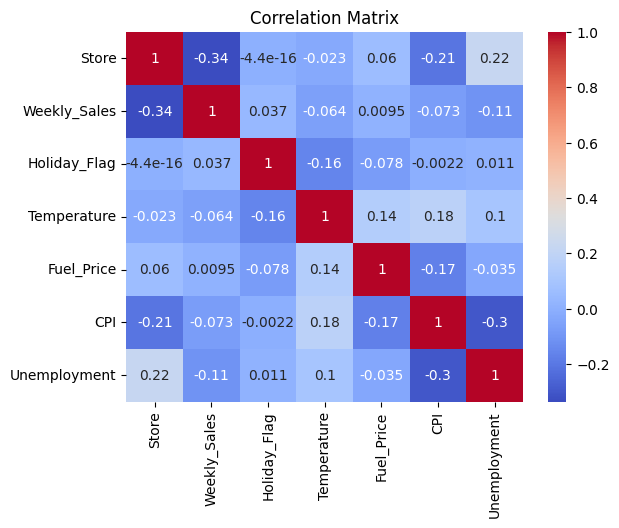

In [60]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()